# 이항분류

## #01. 준비작업

### [1] 패키지 가져오기

In [12]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.classification import *
from hossam.tensor import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기

In [13]:
origin = my_read_excel(path="https://data.hossam.kr/mldata/dogs.xlsx", categories=['dog'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   dog     200 non-null    category
 1   length  200 non-null    float64 
 2   height  200 non-null    float64 
dtypes: category(1), float64(2)
memory usage: 3.6 KB
None

상위 5개 행
+----+-------+----------+----------+
|    | dog   |   length |   height |
|----+-------+----------+----------|
|  0 | d     |    55.01 |    29.27 |
|  1 | d     |    59.01 |    29.39 |
|  2 | d     |    56.53 |     28.5 |
|  3 | d     |    53.66 |     28.5 |
|  4 | d     |    49.67 |    31.97 |
+----+-------+----------+----------+

하위 5개 행
+-----+-------+----------+----------+
|     | dog   |   length |   height |
|-----+-------+----------+----------|
| 195 | j     |    50.95 |    52.37 |
| 196 | j     |    51.86 |     52.4 |
| 197 | j     |    54.24 |    47.82 |
| 198 | j     |    53.13 |    50.22 |
| 199 | j     |       53 |    5

## #02. 데이터 전처리

### [1] 종속변수 라벨링

분류를 수행할 경우 종속변수가 라벨링이 되어 있어야 하며, 데이터 타입이 정수 형태로 설정되어야 한다.

In [14]:
df = my_labelling(origin, 'dog')
df

+-------+---------+
| dog   |   label |
|-------+---------|
| d     |       0 |
| j     |       1 |
+-------+---------+


,dog,length,height
0,0,55.01,29.27
1,0,59.01,29.39
2,0,56.53,28.50
3,0,53.66,28.50
4,0,49.67,31.97
...,...,...,...
195,1,50.95,52.37
196,1,51.86,52.40
197,1,54.24,47.82
198,1,53.13,50.22


### [2] 훈련, 검증 데이터 분리

In [15]:
x_train, x_test, y_train, y_test = my_train_test_split(data=df, yname='dog') 

## #03. 훈련 모델 적합

### [1] 모델 구성

| 구분 | 모델 | 활성화 함수 | 옵티마이저 | 손실함수 | 평가지표 | 대표예제 |
|--|--|--|--|--|--|--|
| 분류 | 이항분류 | [relu,] sigmoid | rmsprop | binary_crossentropy | acc | 타이타닉 생존률 예측 |

In [16]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1], )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

### [2] 모델 학습

In [17]:
result = model.fit(x_train, y_train, epochs=500, validation_data = (x_test, y_test), verbose=0, callbacks=[ EarlyStopping(monitor='val_acc', patience=10, verbose=0), ReduceLROnPlateau(monitor='val_acc', patience=5, min_lr=0.0001, verbose=0)])                                                                                                          

### [3] 학습 곡선 확인

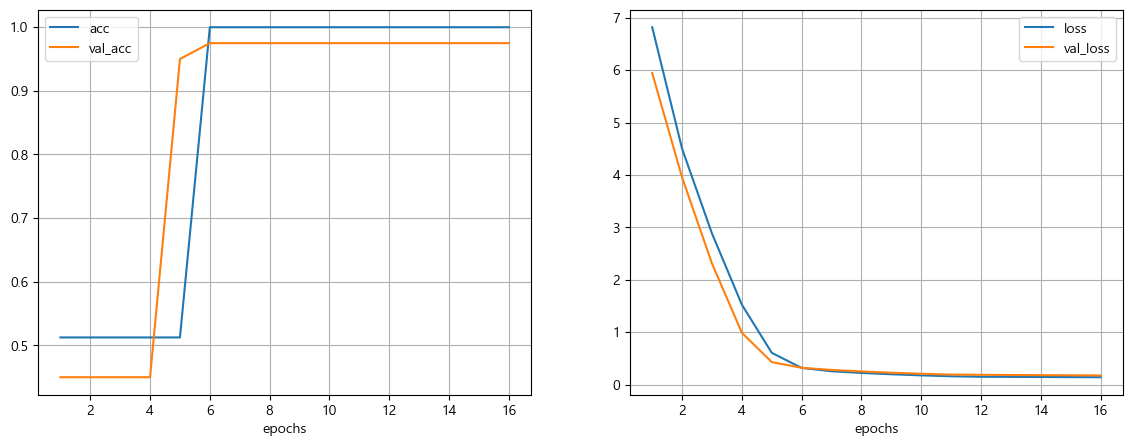

+----------+--------+----------+-----------+------------+-----------------+
|   epochs |    acc |     loss |   val_acc |   val_loss |   learning_rate |
|----------+--------+----------+-----------+------------+-----------------|
|        1 | 0.5125 |  6.81846 |      0.45 |    5.94346 |           0.001 |
|        2 | 0.5125 |      4.5 |      0.45 |     3.9518 |           0.001 |
|        3 | 0.5125 |  2.88148 |      0.45 |    2.30925 |           0.001 |
|        4 | 0.5125 |  1.52367 |      0.45 |   0.987395 |           0.001 |
|        5 | 0.5125 | 0.604812 |      0.95 |   0.427799 |           0.001 |
|        6 |      1 | 0.316726 |     0.975 |   0.319331 |           0.001 |
|        7 |      1 | 0.253281 |     0.975 |   0.278118 |           0.001 |
|        8 |      1 | 0.220977 |     0.975 |   0.249111 |           0.001 |
|        9 |      1 | 0.195869 |     0.975 |   0.225032 |           0.001 |
|       10 |      1 | 0.174845 |     0.975 |   0.205314 |           0.001 |
|       11 |

In [18]:
tf_result(result, history_table=True)

## #04. 성능평가

### [1] 검증 데이터에 대한 예측 결과 산정

sklearn의 경우 `predict()`의 결과가 1차 배열로 리턴되지만 tensor는 2차 배열로 리턴된다.

sklearn의 성능평가 함수를 활용하기 위해서는 `predict()`의 결과를 1차 배열로 변환해야 한다.

In [19]:
test_pred = model.predict(x_test)
data_count, case_count = test_pred.shape
print('%d개의 검증 데이터가 %d개의 경우의 수를 갖는다.' % (data_count, case_count))
print(test_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
40개의 검증 데이터가 1개의 경우의 수를 갖는다.
[[0.28112087]
 [0.9098503 ]
 [0.91936773]
 [0.17402871]
 [0.8523188 ]
 [0.9193753 ]
 [0.2134155 ]
 [0.7595664 ]
 [0.07450171]
 [0.9158753 ]
 [0.1596565 ]
 [0.91572005]
 [0.9145657 ]
 [0.9223174 ]
 [0.22785182]
 [0.14438291]
 [0.03546062]
 [0.89964616]
 [0.21728042]
 [0.26692292]
 [0.90581596]
 [0.9171272 ]
 [0.28842628]
 [0.9085238 ]
 [0.08862591]
 [0.6962323 ]
 [0.875774  ]
 [0.87653875]
 [0.9104513 ]
 [0.10642462]
 [0.29131317]
 [0.12110621]
 [0.89724785]
 [0.9139967 ]
 [0.11295827]
 [0.91337717]
 [0.90571207]
 [0.26700687]
 [0.5518893 ]
 [0.8687101 ]]


### [2] 예측결과를 1차 배열로 변환

> 이 내용을 모듈에 적용함

In [20]:
pred = test_pred.flatten()
pred

array([0.28112087, 0.9098503 , 0.91936773, 0.17402871, 0.8523188 ,
       0.9193753 , 0.2134155 , 0.7595664 , 0.07450171, 0.9158753 ,
       0.1596565 , 0.91572005, 0.9145657 , 0.9223174 , 0.22785182,
       0.14438291, 0.03546062, 0.89964616, 0.21728042, 0.26692292,
       0.90581596, 0.9171272 , 0.28842628, 0.9085238 , 0.08862591,
       0.6962323 , 0.875774  , 0.87653875, 0.9104513 , 0.10642462,
       0.29131317, 0.12110621, 0.89724785, 0.9139967 , 0.11295827,
       0.91337717, 0.90571207, 0.26700687, 0.5518893 , 0.8687101 ],
      dtype=float32)

### [3] 분류 결과 확인

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |            1 |        0.975 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |            1 |     0.956522 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |            1 |            1 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |            0 |    0.0555556 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |            1 |     0.944444 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |            1 |     0.977778 | 정밀도와 재현율의 조화평균                                |
+-------------------+----

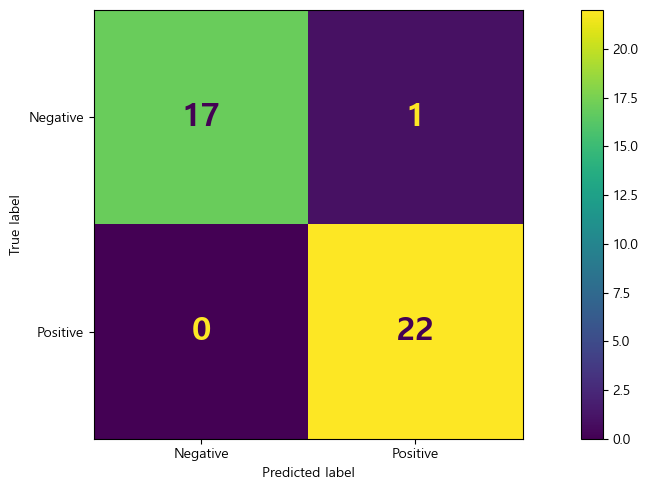


[Roc Curve]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


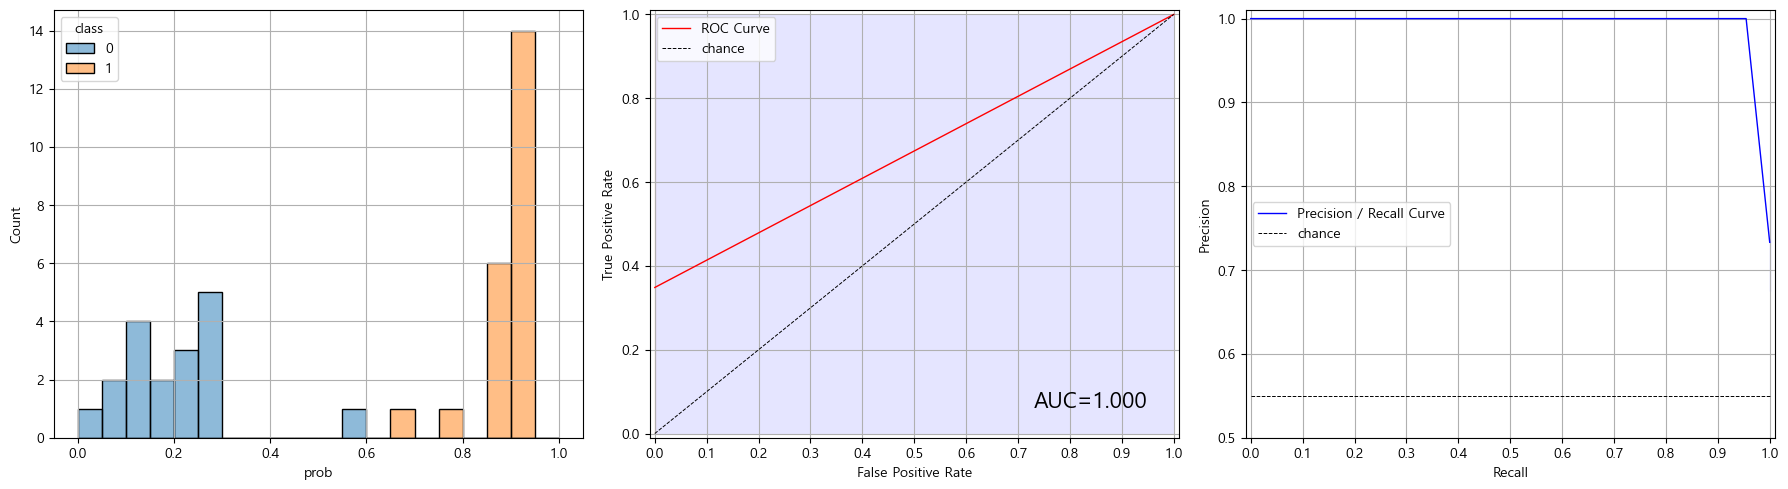


[학습곡선]
이 데이터는 학습곡선을 도출하는데 적합하지 않습니다.


+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | dog        | length     | 13.0742 |
|  1 | dog        | height     | 13.0742 |
+----+------------+------------+---------+


In [22]:
my_classification_result(model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

my_classification_report(model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)